# Importy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm 

___
# Zadanie 1

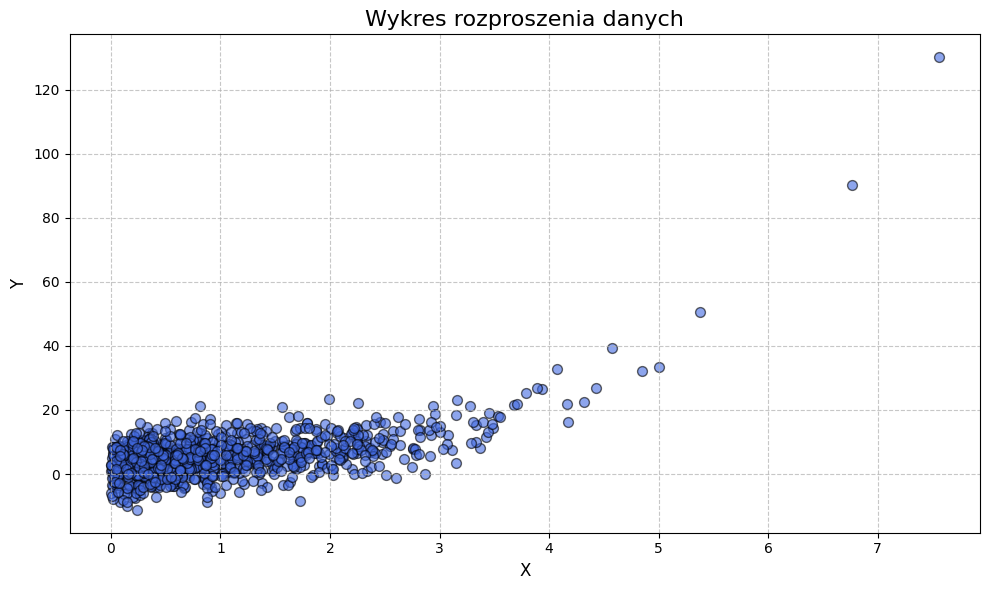

In [2]:
dane = np.loadtxt('zad1.txt')
dane_x = dane[:, 0]
dane_y = dane[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(dane_x, dane_y, color='royalblue', edgecolor='black', alpha=0.6, s=50)
plt.title('Wykres rozproszenia danych', fontsize=16)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

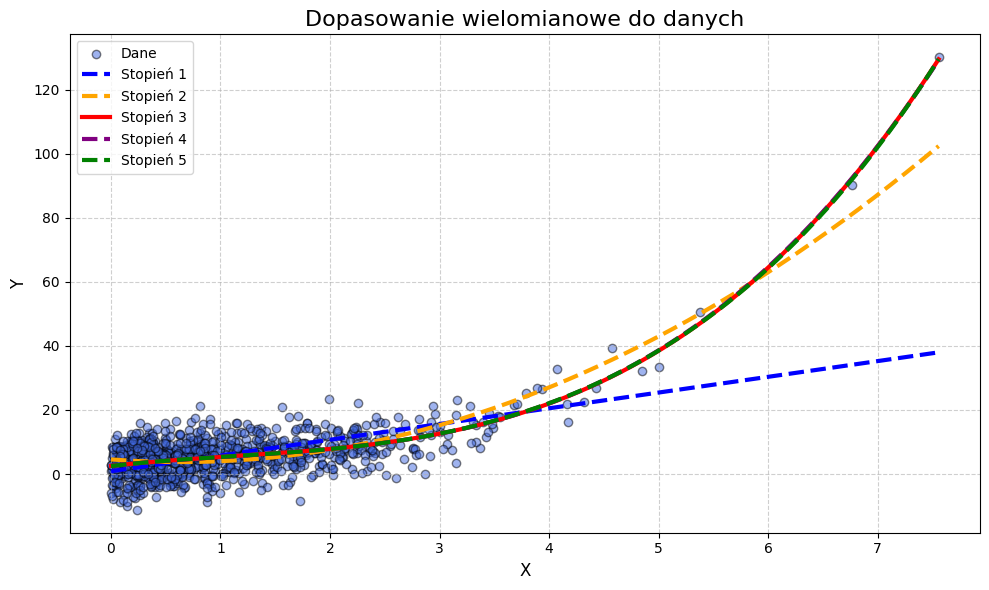

In [12]:
dane = np.loadtxt('zad1.txt')
dane_x = dane[:, 0]
dane_y = dane[:, 1]

poly_fits = [np.polyfit(dane_x, dane_y, deg) for deg in range(1, 6)]
x_values = np.linspace(min(dane_x), max(dane_x), 1000)

colors = ['blue', 'orange', 'red', 'purple', 'green']
linestyles = ['--', '--', '-', '--', '--']
labels = ['Stopień 1', 'Stopień 2', 'Stopień 3', 'Stopień 4', 'Stopień 5']

plt.figure(figsize=(10, 6))
scatter = plt.scatter(dane_x, dane_y, alpha=0.5, color='royalblue', edgecolors='black')

fits = []
for fit, color, ls in zip(poly_fits, colors, linestyles):
    y_fit = np.polyval(fit, x_values)
    line, = plt.plot(x_values, y_fit, color=color, linestyle=ls, linewidth=3)
    fits.append(line)

labels = ['Dane', 'Stopień 1', 'Stopień 2', 'Stopień 3', 'Stopień 4', 'Stopień 5']

plt.legend(labels=labels, fontsize=10)
plt.title('Dopasowanie wielomianowe do danych', fontsize=16)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

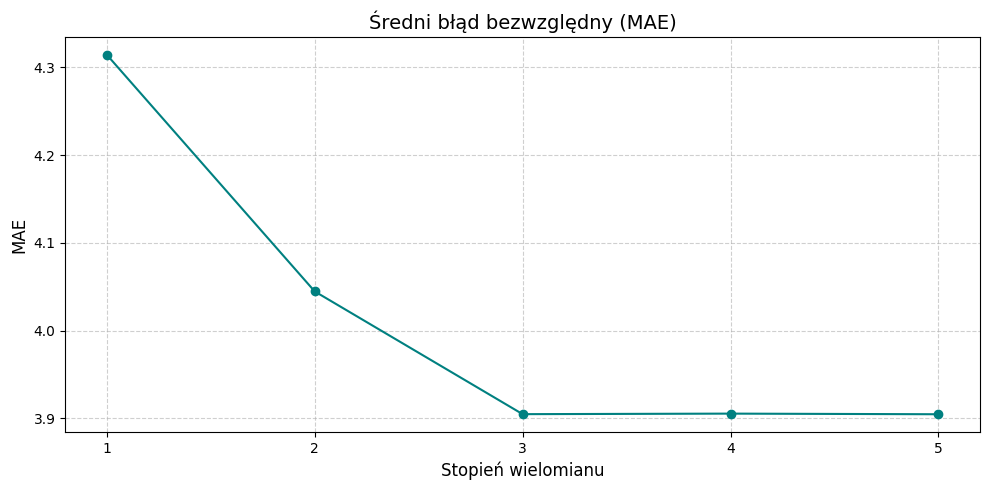

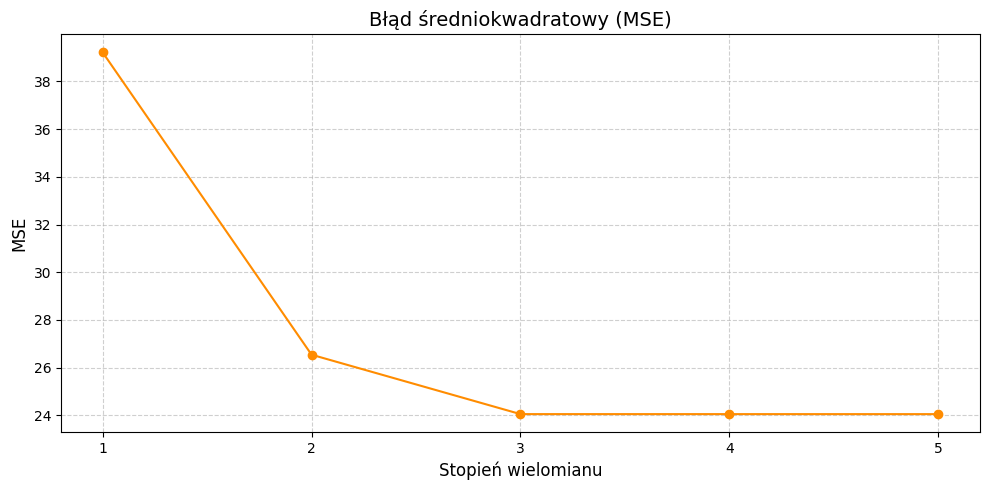

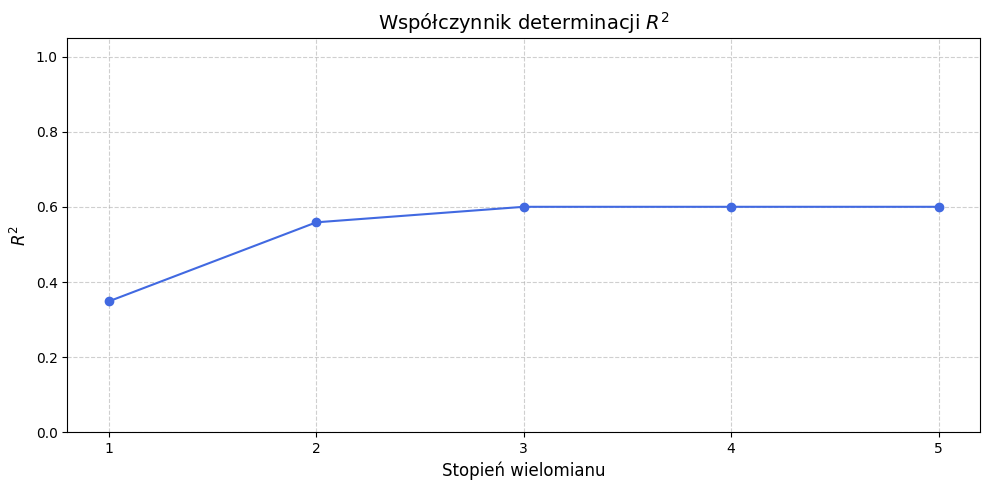

In [ ]:
dane = np.loadtxt('zad1.txt')
dane_x = dane[:, 0]
dane_y = dane[:, 1]

x1 = np.polyfit(dane_x, dane_y, 1)
x2 = np.polyfit(dane_x, dane_y, 2)
x3 = np.polyfit(dane_x, dane_y, 3)
x4 = np.polyfit(dane_x, dane_y, 4)
x5 = np.polyfit(dane_x, dane_y, 5)

y_poly_1 = np.polyval(x1, dane_x)
y_poly_2 = np.polyval(x2, dane_x)
y_poly_3 = np.polyval(x3, dane_x)
y_poly_4 = np.polyval(x4, dane_x)
y_poly_5 = np.polyval(x5, dane_x)

def d(y, y_appr, n):
    return np.sum(abs(y - y_appr)) / n

def mse(y, y_appr, n):
    return np.sum((y - y_appr) ** 2) / n

def r_sqr(y, y_appr):
    return np.sum((y_appr - np.mean(y)) ** 2) / np.sum((y - np.mean(y)) ** 2)

d_values = np.zeros(5)
mse_values = np.zeros(5)
r_sqr_values = np.zeros(5)

polys = [y_poly_1, y_poly_2, y_poly_3, y_poly_4, y_poly_5]

for i in range(5):
    d_values[i] = d(dane_y, polys[i], len(dane_y))
    mse_values[i] = mse(dane_y, polys[i], len(dane_y))
    r_sqr_values[i] = r_sqr(dane_y, polys[i])

x_range = range(1, 6)

plt.figure(figsize=(10, 5))
plt.plot(x_range, d_values, marker='o', color='teal')
plt.title('Średni błąd bezwzględny (MAE)', fontsize=14)
plt.xlabel('Stopień wielomianu', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(x_range)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(x_range, mse_values, marker='o', color='darkorange')
plt.title('Błąd średniokwadratowy (MSE)', fontsize=14)
plt.xlabel('Stopień wielomianu', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(x_range)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(x_range, r_sqr_values, marker='o', color='royalblue')
plt.title('Współczynnik determinacji $R^2$', fontsize=14)
plt.xlabel('Stopień wielomianu', fontsize=12)
plt.ylabel('$R^2$', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(x_range)
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

___
# Zadanie 2

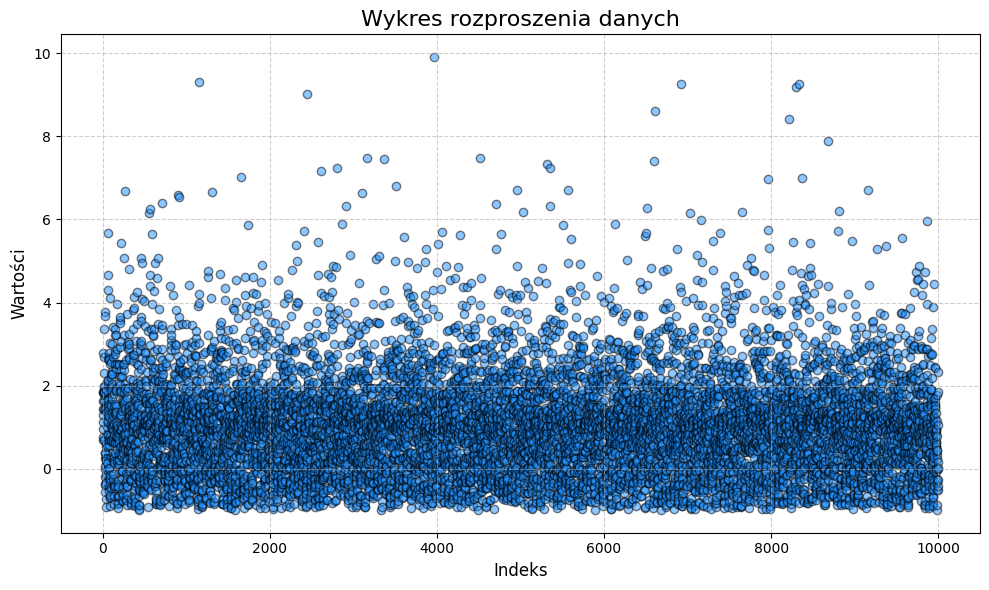

In [13]:
dane2 = np.loadtxt('zad2.txt')

plt.figure(figsize=(10, 6))
plt.scatter(range(len(dane2)), dane2, alpha=0.5, color='dodgerblue', edgecolors='black')
plt.title('Wykres rozproszenia danych', fontsize=16)
plt.xlabel('Indeks', fontsize=12)
plt.ylabel('Wartości', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

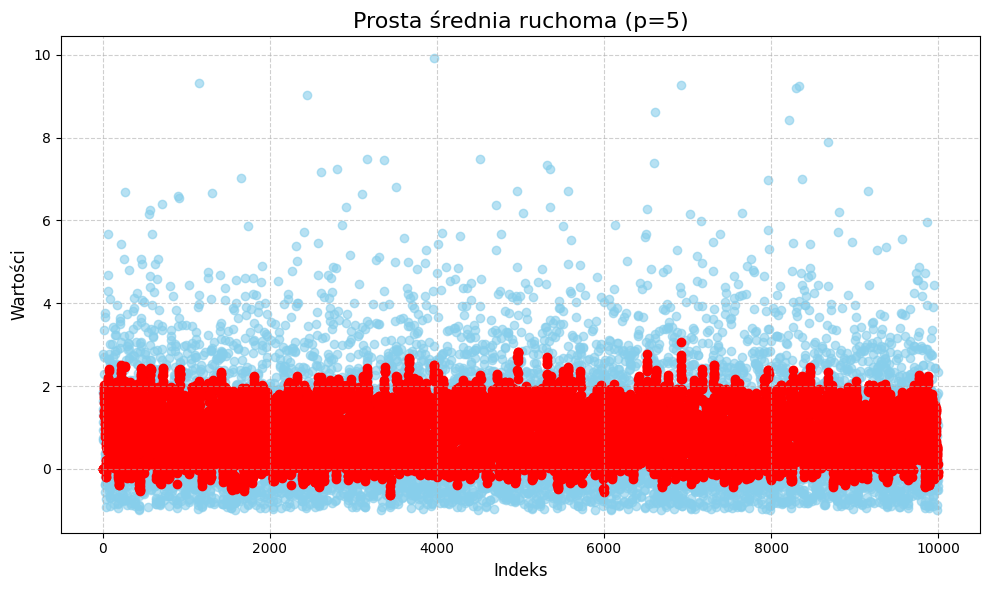

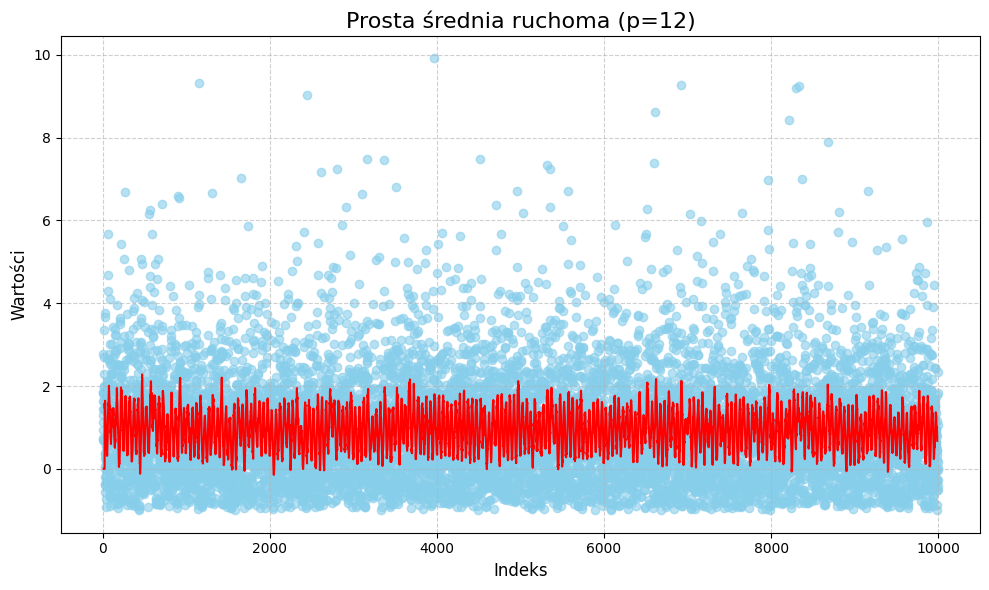

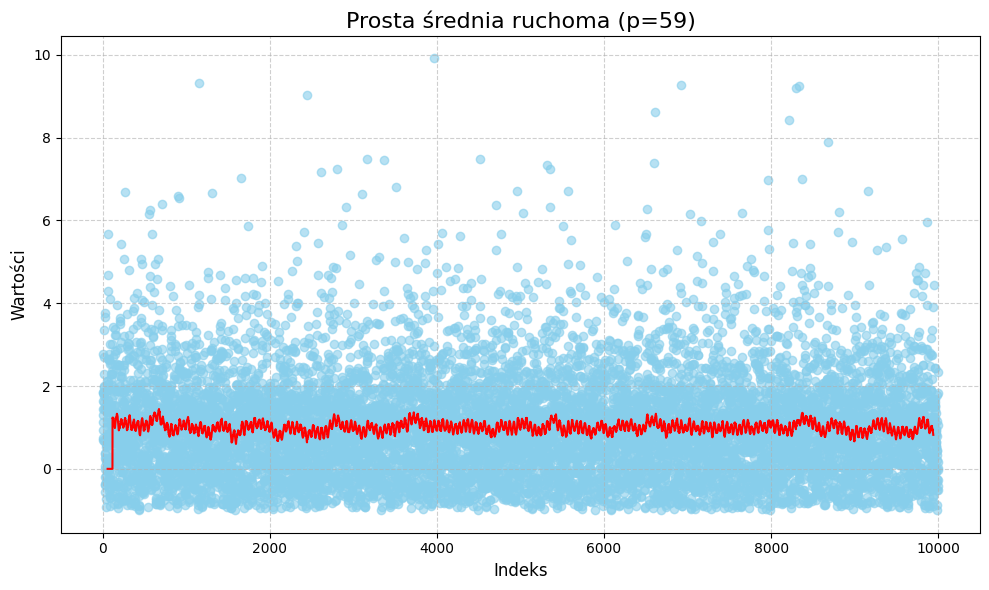

In [ ]:
def sma(data, p):
    smoothed_data = np.zeros(len(data) - 2 * p)
    for i in range(len(data) - 2 * p):
        smoothed_data[i] = np.sum(data[i - p:i + p]) / (2 * p + 1)
    return smoothed_data

smoothed = sma(dane2, p=5)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(dane2)), dane2, color='skyblue', alpha=0.6)
plt.scatter(range(5, len(dane2) - 5), smoothed, color='red')
plt.title('Prosta średnia ruchoma (p=5)', fontsize=16)
plt.xlabel('Indeks', fontsize=12)
plt.ylabel('Wartości', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

smoothed = sma(dane2, p=12)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(dane2)), dane2, color='skyblue', alpha=0.6)
plt.plot(range(12, len(dane2) - 12), smoothed, color='red')
plt.title('Prosta średnia ruchoma (p=12)', fontsize=16)
plt.xlabel('Indeks', fontsize=12)
plt.ylabel('Wartości', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

smoothed = sma(dane2, p=59)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(dane2)), dane2, color='skyblue', alpha=0.6)
plt.plot(range(59, len(dane2) - 59), smoothed, color='red')
plt.title('Prosta średnia ruchoma (p=59)', fontsize=16)
plt.xlabel('Indeks', fontsize=12)
plt.ylabel('Wartości', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

___
# Zadanie 3

a =  19.966464658199964 
b = 5.226906171237193


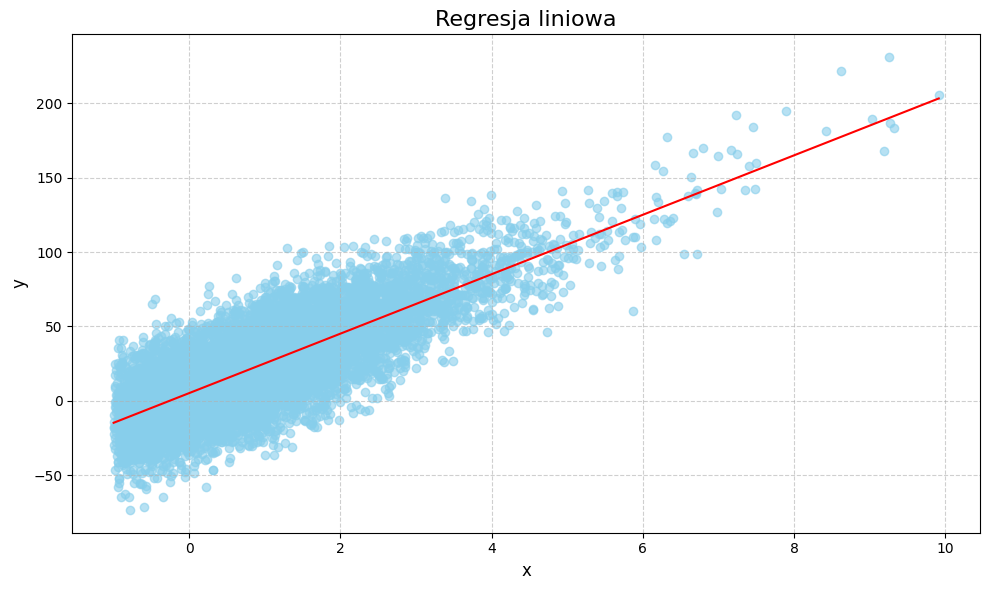

In [ ]:
def regresja_najmn_kwadrt(x, y, n):
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    a = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
    b = y_mean - a * x_mean

    return [a, b]

dane_x = np.loadtxt('zad2.txt')
dane_y = np.loadtxt('zad3.txt')

n = len(dane_x)

a, b = regresja_najmn_kwadrt(dane_x, dane_y, n)
print('a = ', a, '\nb =', b)

plt.figure(figsize=(10, 6))
plt.scatter(dane_x, dane_y, color='skyblue', alpha=0.6)
values_range = np.linspace(min(dane_x), max(dane_x), 10000)
plt.plot(values_range, a * values_range + b, color='red')
plt.title('Regresja liniowa', fontsize=16)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

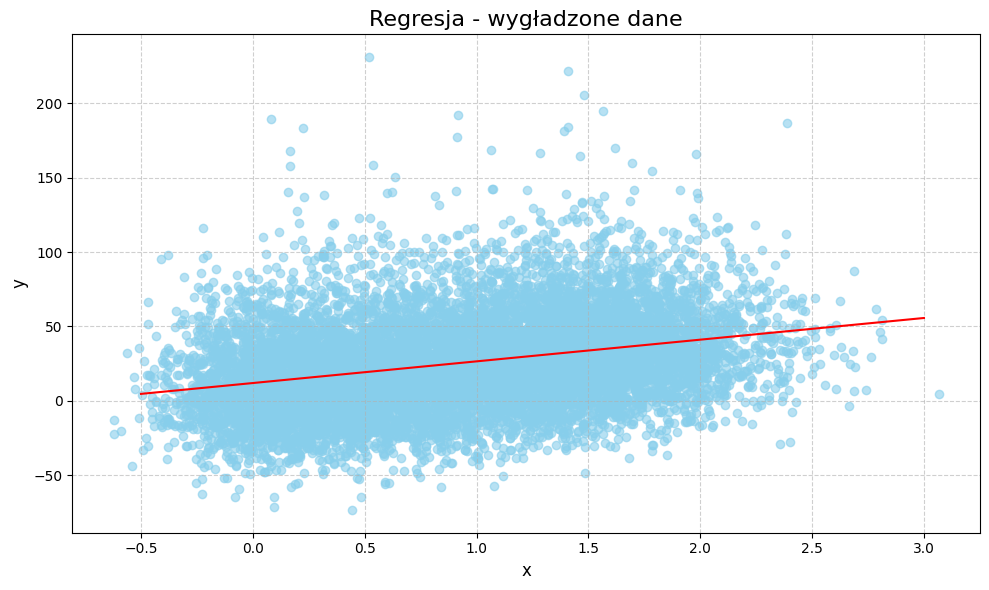

In [18]:
x_2 = sma(dane_x, 5)
y_2 = dane_y[5:-5]

a_2, b_2 = regresja_najmn_kwadrt(x_2, y_2, n)

plt.figure(figsize=(10, 6))
plt.scatter(x_2, y_2, color='skyblue', alpha=0.6)
values_range = np.linspace(-0.5, 3, 1000)
plt.plot(values_range, a_2 * values_range + b_2, color='red')
plt.title('Regresja - wygładzone dane', fontsize=16)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

___
# Zadanie 4

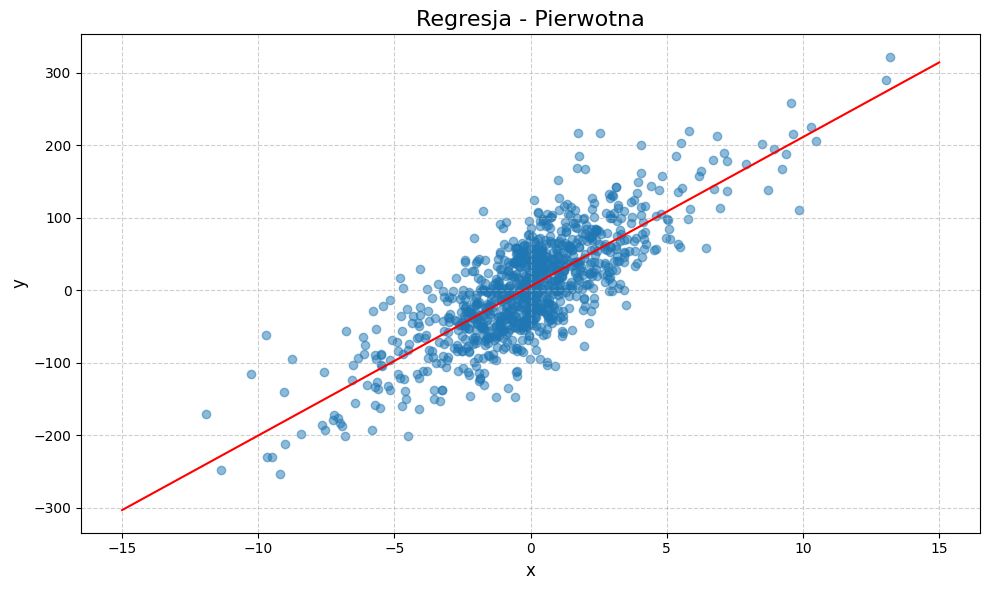

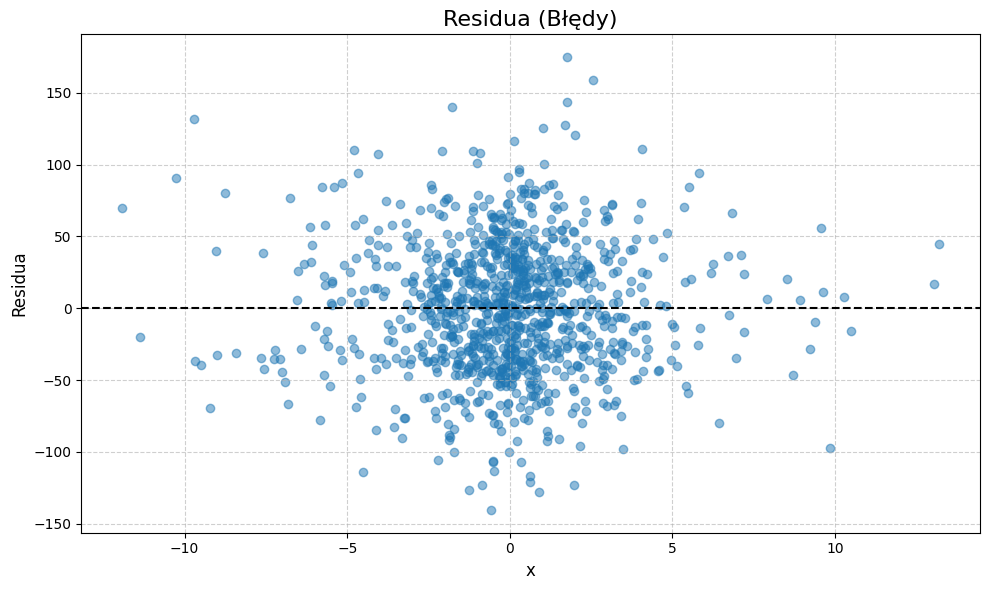

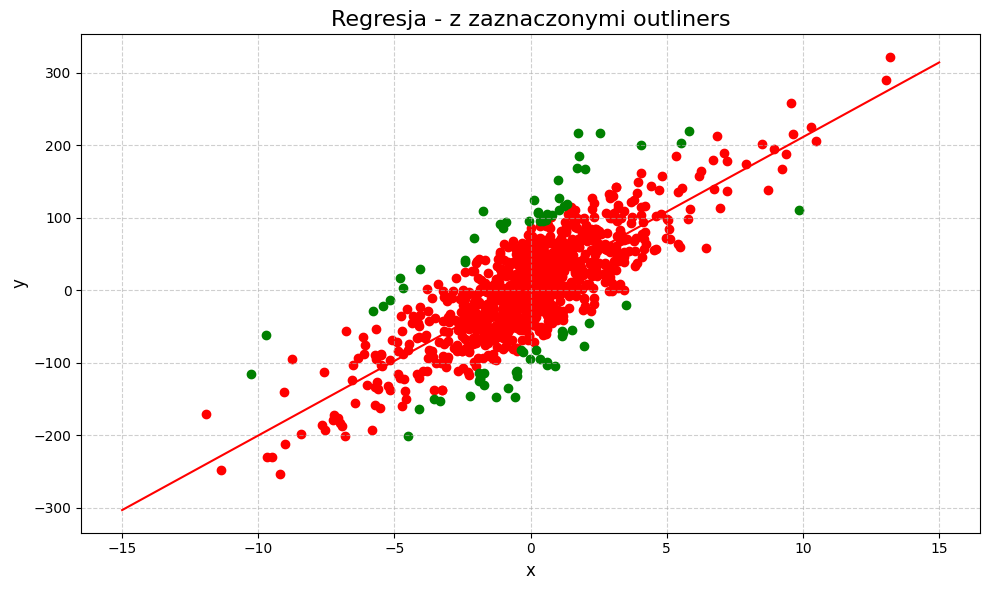

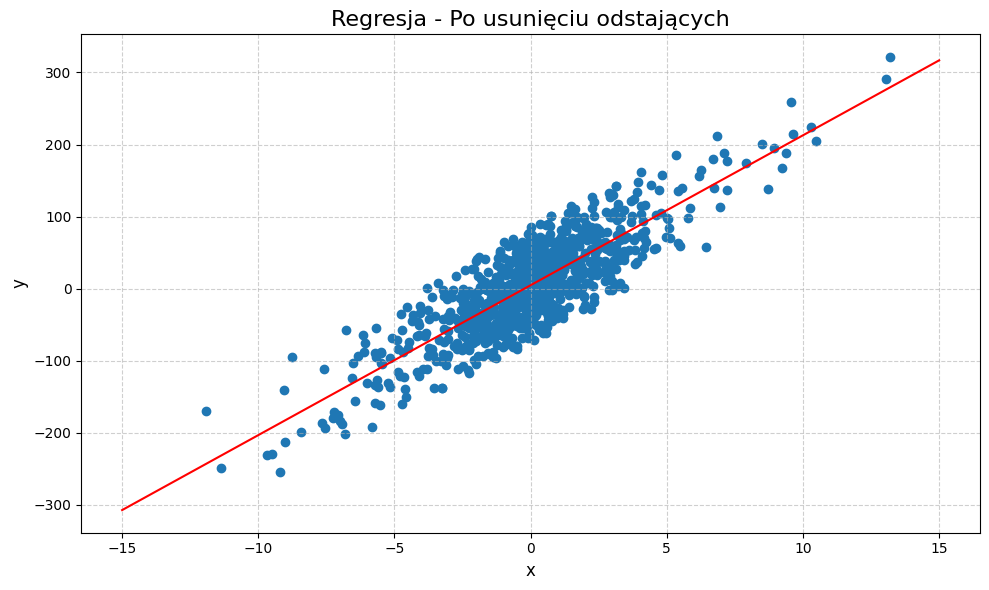

In [20]:
dane = np.loadtxt('zad4.txt')
dane_x = dane[:, 0]
dane_y = dane[:, 1]

a_4, b_4 = regresja_najmn_kwadrt(dane_x, dane_y, len(dane_x))

y_pred = a_4 * dane_x + b_4
residua = dane_y - y_pred

index = []
for i in range(len(residua)):
    if np.abs(residua[i]) > 80:
        index.append(False)
    else:
        index.append(True)

x_in = dane_x[index]
y_in = dane_y[index]

outliners_index = []
for i in range(len(residua)):
    if np.abs(residua[i]) > 80:
        outliners_index.append(True)
    else:
        outliners_index.append(False)

x_out = dane_x[outliners_index]
y_out = dane_y[outliners_index]

a_clean, b_clean = regresja_najmn_kwadrt(x_in, y_in, len(x_in))
values_range = np.linspace(-15, 15, 1000)

plt.figure(figsize=(10, 6))
plt.plot(values_range, a_4 * values_range + b_4, color='red')
plt.scatter(dane_x, dane_y, alpha=0.5)
plt.title('Regresja - Pierwotna', fontsize=16)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(dane_x, residua, alpha=0.5)
plt.axhline(sum(residua), color='black', linestyle='--')
plt.title('Residua (Błędy)', fontsize=16)
plt.xlabel('x', fontsize = 12)
plt.ylabel('Residua', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(values_range, a_4 * values_range + b_4, color='red')
plt.scatter(x_in, y_in, color='red')
plt.scatter(x_out, y_out, color='green')
plt.title('Regresja - z zaznaczonymi outliners', fontsize=16)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(values_range, a_clean * values_range + b_clean, color='red')
plt.scatter(x_in, y_in)
plt.title('Regresja - Po usunięciu odstających', fontsize=16)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

___
# Zadanie 5

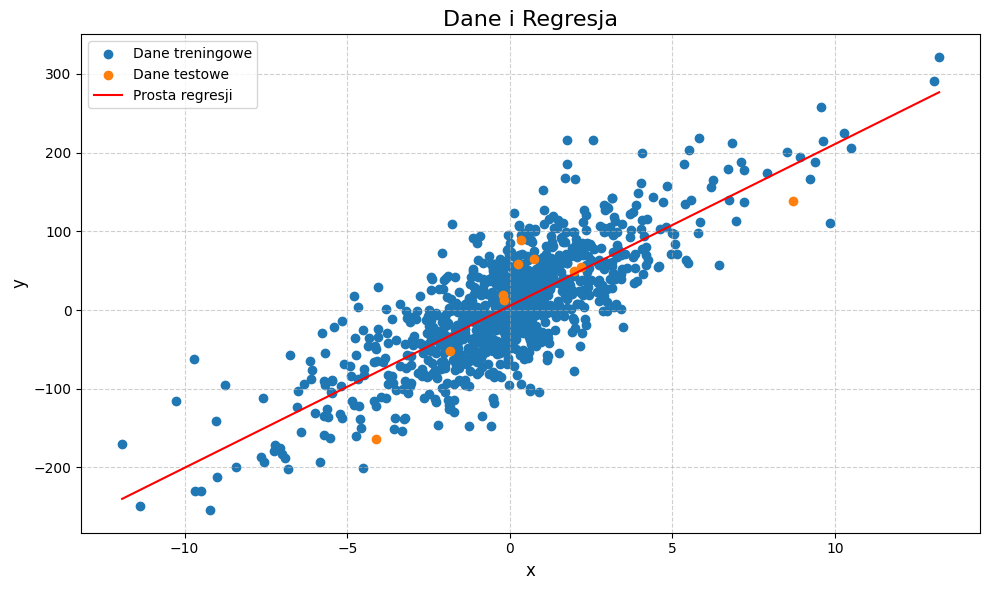

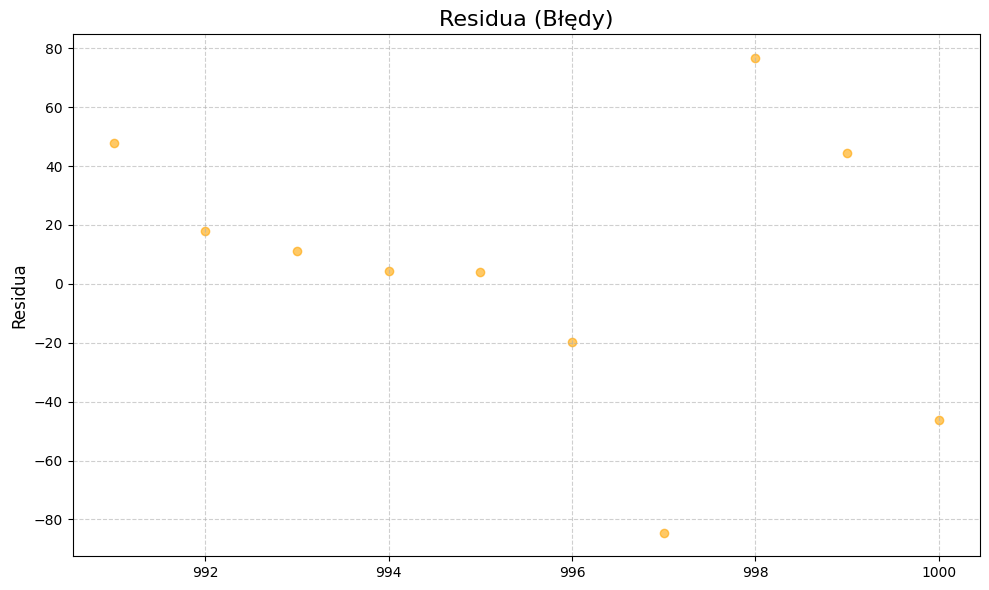

MSE treningowe: 2094.2762537603803
MSE testowe: 2026.2648183297729
d treningowe: 36.701512636191524
d testowe: 35.6890747778359


In [21]:
dane = np.loadtxt('zad4.txt')
dane_x = dane[:, 0]
dane_y = dane[:, 1]

dane_x_treningowe = dane_x[:990]
dane_y_treningowe = dane_y[:990]
dane_x_testowe = dane_x[990:1000]
dane_y_testowe = dane_y[990:1000]

a_5, b_5 = regresja_najmn_kwadrt(dane_x_treningowe, dane_y_treningowe, len(dane_x_treningowe))

y_pred_treningowe = a_5 * dane_x_treningowe + b_5
y_pred_testowe = a_5 * dane_x_testowe + b_5

e_treningowe = dane_y_treningowe - y_pred_treningowe
e_testowe = dane_y_testowe - y_pred_testowe

mse_tren = mse(dane_y_treningowe, y_pred_treningowe, len(dane_y_treningowe))
mse_test = mse(dane_y_testowe, np.polyval([a_5, b_5], dane_x_testowe), len(dane_y_testowe))
d_tren = d(dane_y_treningowe, y_pred_treningowe, len(dane_y_treningowe))
d_test = d(dane_y_testowe, y_pred_testowe, len(dane_y_testowe))

values_range = np.linspace(min(dane_x), max(dane_x), 1000)

plt.figure(figsize=(10, 6))
plt.scatter(dane_x_treningowe, dane_y_treningowe, label='Dane treningowe')
plt.scatter(dane_x_testowe, dane_y_testowe, label='Dane testowe')
plt.plot(values_range, a_5 * values_range + b_5, label='Prosta regresji', color='red')
plt.title('Dane i Regresja', fontsize=16)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(range(991, 1001), e_testowe, color='orange', alpha=0.6)
plt.title('Residua (Błędy)', fontsize=16)
plt.ylabel('Residua', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print('MSE treningowe:', mse_tren)
print('MSE testowe:', mse_test)
print('d treningowe:', d_tren)
print('d testowe:', d_test)

___
# Zadanie 6

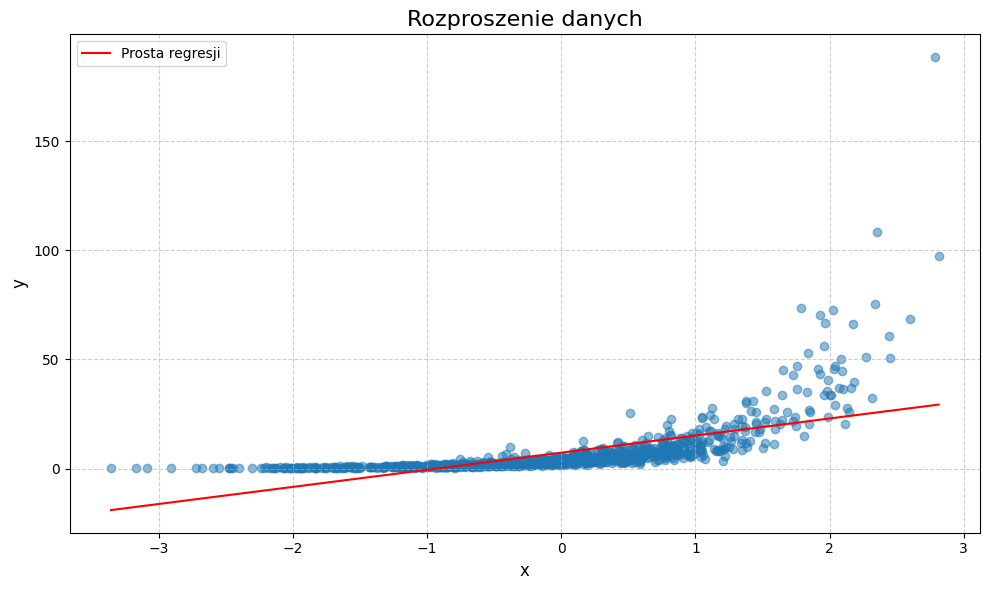

Współczynniki regresji dla przekształconych danych:
a= 1.1869261103422122 
b= 1.1904809318009153


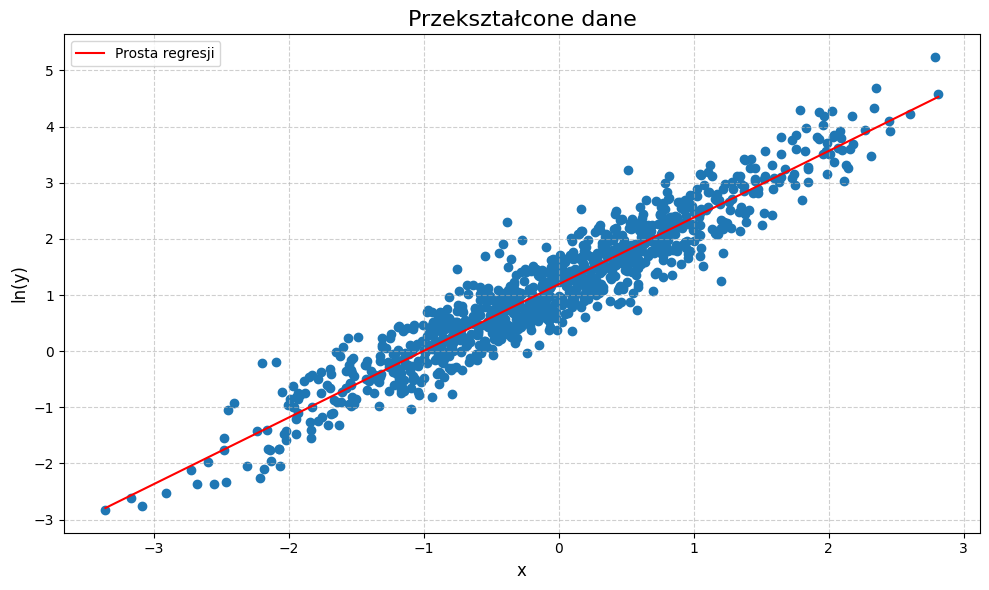

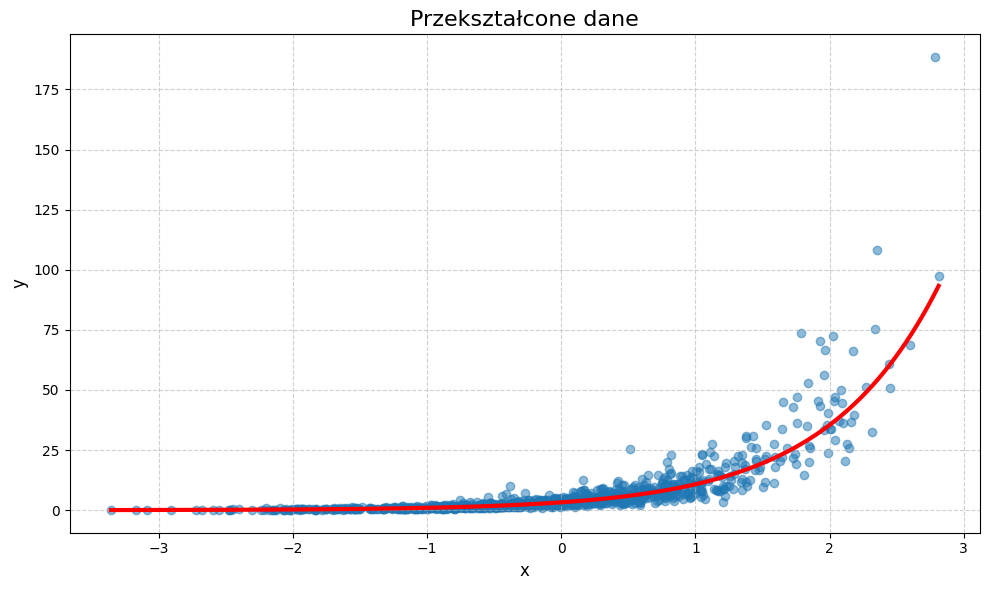

In [22]:
dane = np.loadtxt('zad6.txt')
dane_x = dane[:, 0]
dane_y = dane[:, 1]

a_6, b_6 = regresja_najmn_kwadrt(dane_x, dane_y, len(dane_x))
values_range = np.linspace(min(dane_x), max(dane_x), 1000)

plt.figure(figsize=(10, 6))
plt.plot(values_range, a_6 * values_range + b_6, label='Prosta regresji', color='red')
plt.scatter(dane_x, dane_y, alpha=0.5)
plt.title('Rozproszenie danych', fontsize=16)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

y_transformed = np.log(dane_y)
a_6_transformed, b_6_transformed = regresja_najmn_kwadrt(dane_x, y_transformed, len(dane_x))

print('Współczynniki regresji dla przekształconych danych:\na=', a_6_transformed, '\nb=', b_6_transformed)

plt.figure(figsize=(10, 6))
plt.scatter(dane_x, y_transformed)
plt.plot(values_range, a_6_transformed * values_range + b_6_transformed, label='Prosta regresji', color='red')
plt.title('Przekształcone dane', fontsize=16)
plt.xlabel('x', fontsize=12)
plt.ylabel('ln(y)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

def polyval_6(x):
    return np.exp(a_6_transformed) * np.exp(b_6_transformed * x)

plt.figure(figsize=(10, 6))
plt.scatter(dane_x, dane_y, alpha=0.5)
plt.plot(values_range, polyval_6(values_range), color='red', linewidth=3)
plt.title('Przekształcone dane', fontsize=16)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()